# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from pprint import pprint

In [2]:
# Import API key
from config import api_key

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count =len(cities)
city_count

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Create base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
#Query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [7]:
#more lists
latitude =[]
longitude =[]
temp =[]
humidity=[]
cloudiness=[]
wind_speed=[]
date=[]
country=[]

In [8]:
#for loop
print("Beginning Data Retrieval")
print('---------------------------')
for ct in range(city_count):
    response = requests.get(f"{query_url}{cities[ct]}").json()
    
    try:
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
    except KeyError:
        latitude.append(np.nan)
        longitude.append(np.nan)
        temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(0)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)

    
    print(f'Processing Record {ct+1} | {cities[ct]}')
    
print('-------------------------------')
print('Data Processing Complete')
print('-------------------------------')

Beginning Data Retrieval
---------------------------
Processing Record 1 | chokurdakh
Processing Record 2 | albany
Processing Record 3 | rikitea
Processing Record 4 | illoqqortoormiut
Processing Record 5 | coquimbo
Processing Record 6 | east london
Processing Record 7 | lebu
Processing Record 8 | butaritari
Processing Record 9 | clyde river
Processing Record 10 | nyuksenitsa
Processing Record 11 | new norfolk
Processing Record 12 | punta arenas
Processing Record 13 | cayenne
Processing Record 14 | soe
Processing Record 15 | shasta lake
Processing Record 16 | touros
Processing Record 17 | yellowknife
Processing Record 18 | chumikan
Processing Record 19 | nerja
Processing Record 20 | whitehorse
Processing Record 21 | torbay
Processing Record 22 | fortuna
Processing Record 23 | sioux lookout
Processing Record 24 | tuktoyaktuk
Processing Record 25 | banda aceh
Processing Record 26 | vaini
Processing Record 27 | geraldton
Processing Record 28 | hermanus
Processing Record 29 | hamilton
Proce

Processing Record 247 | mackenzie
Processing Record 248 | usogorsk
Processing Record 249 | tokur
Processing Record 250 | luderitz
Processing Record 251 | karratha
Processing Record 252 | port hardy
Processing Record 253 | rungata
Processing Record 254 | the pas
Processing Record 255 | dubbo
Processing Record 256 | kaeo
Processing Record 257 | chagda
Processing Record 258 | matay
Processing Record 259 | luganville
Processing Record 260 | kanniyakumari
Processing Record 261 | patnos
Processing Record 262 | prince george
Processing Record 263 | ranau
Processing Record 264 | chapais
Processing Record 265 | general roca
Processing Record 266 | saleaula
Processing Record 267 | vangaindrano
Processing Record 268 | kazalinsk
Processing Record 269 | cozumel
Processing Record 270 | riyadh
Processing Record 271 | mildura
Processing Record 272 | kutum
Processing Record 273 | beidao
Processing Record 274 | jasper
Processing Record 275 | norman wells
Processing Record 276 | hofn
Processing Record 27

Processing Record 495 | santa rosa
Processing Record 496 | mao
Processing Record 497 | cabedelo
Processing Record 498 | comodoro rivadavia
Processing Record 499 | pemangkat
Processing Record 500 | klaksvik
Processing Record 501 | bull savanna
Processing Record 502 | ribeira brava
Processing Record 503 | baruun-urt
Processing Record 504 | agirish
Processing Record 505 | igarka
Processing Record 506 | lima
Processing Record 507 | paradwip
Processing Record 508 | brae
Processing Record 509 | irati
Processing Record 510 | oussouye
Processing Record 511 | sur
Processing Record 512 | fiumicino
Processing Record 513 | ahipara
Processing Record 514 | meadow lake
Processing Record 515 | wajima
Processing Record 516 | tual
Processing Record 517 | pacific grove
Processing Record 518 | doctor pedro p. pena
Processing Record 519 | sao joao da barra
Processing Record 520 | backo gradiste
Processing Record 521 | rocha
Processing Record 522 | elk city
Processing Record 523 | saint-pierre
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#create data frame
city_weather = pd.DataFrame({"City":cities,
                            "Cloudiness": cloudiness,
                            "Country": country,
                            "Date": date,
                            "Humidity": humidity,
                            "Lat": latitude,
                            "Lng": longitude,
                            "Max Temp": temp,
                            "Wind Speed": wind_speed,
                            })
#remove empty values
city_weather = city_weather.dropna(how='any')

# Output File (CSV)
city_weather.to_csv = "city_weather.csv"

city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,chokurdakh,56,RU,1.542486e+09,68.0,70.62,147.90,-9.13,3.36
1,albany,90,US,1.542484e+09,60.0,42.65,-73.75,42.98,9.17
2,rikitea,0,PF,1.542486e+09,99.0,-23.12,-134.97,76.29,12.19
4,coquimbo,0,CL,1.542485e+09,53.0,-29.95,-71.34,71.60,18.34
5,east london,92,ZA,1.542486e+09,100.0,-33.02,27.91,66.39,9.95


In [10]:
city_weather.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
#pull date 
date = time.strftime("%m/%d/%Y")

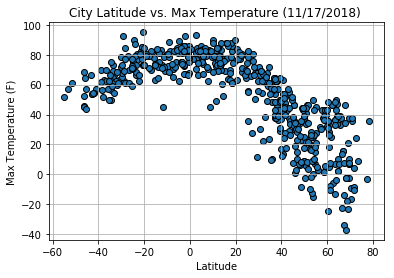

In [12]:
#plot lat vs temp (max temp)
plt.scatter(city_weather['Lat'], city_weather['Max Temp'], edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature ({date}) ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#save figure
plt.savefig("figures/Temp(F) vs Latitude.png")
#show figure
plt.show()

#### Latitude vs. Humidity Plot

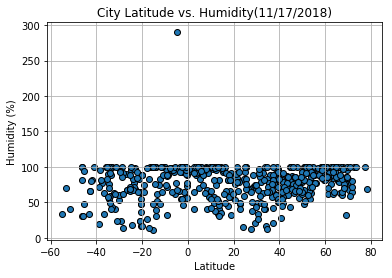

In [13]:
plt.scatter(city_weather['Lat'], city_weather['Humidity'], edgecolor="black")
plt.title(f'City Latitude vs. Humidity({date})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#save figure
plt.savefig("figures/Humidity(%) vs Latitude.png")
#show figure
plt.show()

#### Latitude vs. Cloudiness Plot

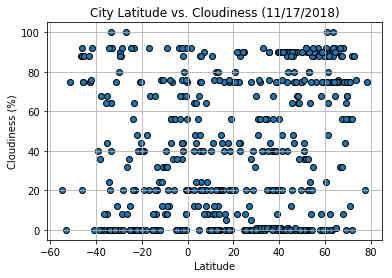

In [14]:
plt.scatter(city_weather['Lat'], city_weather['Cloudiness'], edgecolor="black")
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#save figure
plt.savefig("figures/Cloudiness(%) vs Latitude.png")
#show figure
plt.show()

#### Latitude vs. Wind Speed Plot

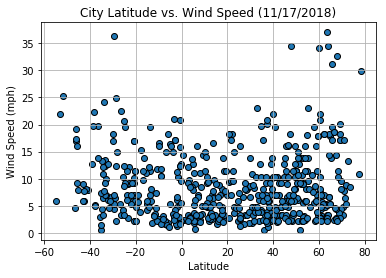

In [15]:
plt.scatter(city_weather['Lat'], city_weather['Wind Speed'], edgecolor="black")
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#save figure
plt.savefig("figures/Wind Speed vs Latitude.png")
#show figure
plt.show()

In [16]:
#Analysis
